## Data Preparation
***

##### Importing all libraries 

In [1]:
import pandas as pd # Data analysis and manipulation 
import numpy as np # Numerical operations
import warnings # Current version of Seaborn generates a bunch of warnings that will be ignored.
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

##### Importing Haberman dataset and renaming the headers

In [2]:
haberman = pd.read_csv(r'C:\Users\akhil\EDA\EDA_cancer\haberman.csv', header = None, names = ['age','year_of_treatment','positive_lymph_node','survival_status_after_5_years'])
haberman.head()

,age,year_of_treatment,positive_lymph_node,survival_status_after_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


##### Renaming 1's and 2's from last colomn
- step-1: applied uinque function to validate seperation
- step-2: mapped 1's and 2's with yes and no
- step-3: set as category datatype

In [3]:
print(list(haberman['survival_status_after_5_years'].unique()))
haberman['survival_status_after_5_years'] = haberman['survival_status_after_5_years'].map({1:'yes',2:'no'})
# haberman['survival_status_after_5_years'] = haberman['survival_status_after_5_years'].apply(lambda x: 'yes' if x == 1 else 'no')
haberman['survival_status_after_5_years'] = haberman['survival_status_after_5_years'].astype('category')
haberman.head()
 # list of data of patients who are alive and dead
surv_yes = haberman.loc[haberman['survival_status_after_5_years']=='yes']
surv_no = haberman.loc[haberman['survival_status_after_5_years'] =='no']

[1, 2]


## Data Description 
***

In [4]:
print(haberman.info())
print(haberman.isnull().any())
print('\n')
print('*'*100)
print('\n')
print(haberman.describe())
print('\n')
print('*'*100)
print('\n')
print('No. of rows:' + str(haberman.shape[0]))
print('No. of columns:'+ str(haberman.shape[1]))
print('Columns:' + ', '.join(haberman.columns))
print('Target variable distribution')
print(haberman.iloc[:,-1].value_counts())
print('*'*50)
print(haberman.iloc[:,-1].value_counts(normalize = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year_of_treatment                306 non-null int64
positive_lymph_node              306 non-null int64
survival_status_after_5_years    306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB
None
age                              False
year_of_treatment                False
positive_lymph_node              False
survival_status_after_5_years    False
dtype: bool


****************************************************************************************************


              age  year_of_treatment  positive_lymph_node
count  306.000000         306.000000           306.000000
mean    52.457516          62.852941             4.026144
std     10.803452           3.249405             7.189654
min     30.000000          58.000000             0.000000
25%     44.000000          60.000000             0.000000
50%     

### Observation -

* In first table, it's states that - 
    - Total 306 records with four different observations are implemented
    - 3 observations are numerical and last one is categorical(we have changed)
    - No missing values are there in the data set
* Second table states that - 
    - The age group is from 30 to 83
    - Up to 25% of the patients don't have lymph nodes
    - Up to 75% there are less then 5 lymph nodes were detected 
    - Where highest is 52, which was detected 
* Third table states that - 
    - Out of 306, 225 i.e., 74% survived more than 5 years after surgery 
    - And 81(26%) were unfortunate
    - It's a **imbalanced data set**

#### Understanding both(survived and died) target variables

In [5]:
print('\n')
print('*'*40,'Patients Survived', '*'*40)
print('\n')
print(surv_yes.describe())
print('\n')
print('*'*40, 'Patients Died', '*'*40)
print('\n')
print(surv_no.describe())



**************************************** Patients Survived ****************************************


              age  year_of_treatment  positive_lymph_node
count  225.000000         225.000000           225.000000
mean    52.017778          62.862222             2.791111
std     11.012154           3.222915             5.870318
min     30.000000          58.000000             0.000000
25%     43.000000          60.000000             0.000000
50%     52.000000          63.000000             0.000000
75%     60.000000          66.000000             3.000000
max     77.000000          69.000000            46.000000


**************************************** Patients Died ****************************************


             age  year_of_treatment  positive_lymph_node
count  81.000000          81.000000            81.000000
mean   53.679012          62.827160             7.456790
std    10.167137           3.342118             9.185654
min    34.000000          58.000000           

In [6]:
# Having no lymph node found in patients 
lived = surv_yes.loc[surv_yes['positive_lymph_node'] == 0]
died = surv_no.loc[surv_no['positive_lymph_node'] == 0]
print(lived.count()); print(died.count())

age                              117
year_of_treatment                117
positive_lymph_node              117
survival_status_after_5_years    117
dtype: int64
age                              19
year_of_treatment                19
positive_lymph_node              19
survival_status_after_5_years    19
dtype: int64


### Observations -
* 75% of the Longer survived patients has >= 3 lymph being found.
* Even after having 46 lymph nodes, a patient survived more than 5 years.
* Most of the patients who have undergone for surgury, have survived more than 5 year whose age is less than 34.
* Even having no lymph nodes found, 117(of 225) i.e.,52% survived longer and 19(of 81) i.e., 23% didn't make through.

## Data visualization
***

### Univariate Analysis

#### Histogram

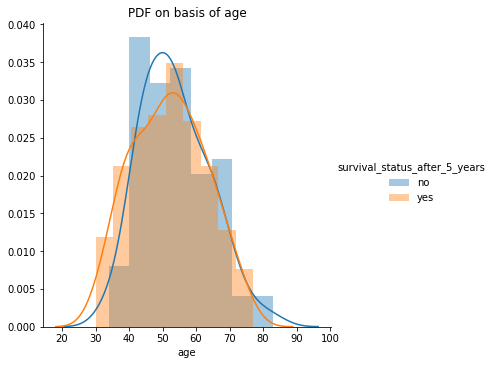

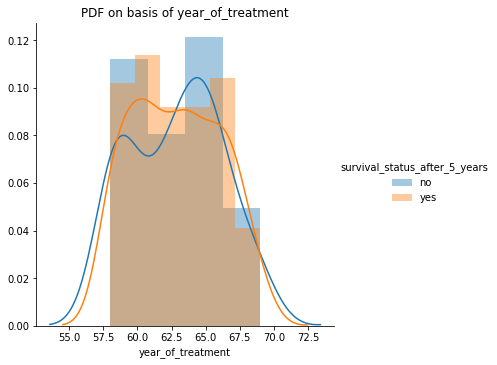

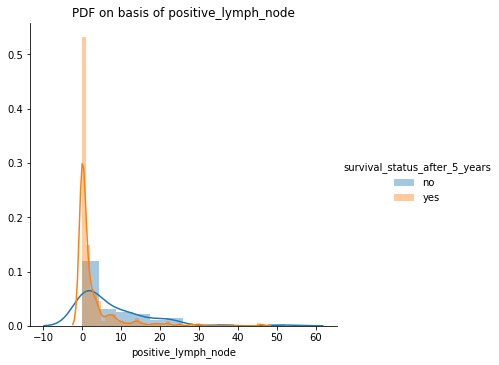

In [7]:
for feature in list(haberman.columns[:-1]):
    sns.FacetGrid(haberman,hue = 'survival_status_after_5_years',height = 5)  \
    .map(sns.distplot,feature)  \
    .add_legend()
    plt.title('PDF on basis of ' + feature)
    plt.show()
# Another part of code for ploting the graphs is by using "funciton method"

# def density_plot(feature_var, class_var):
#    ''Method to constuct a density plot with the given feature and class variables''
#   sns.set_style(style="whitegrid")
#    sns.FacetGrid(data=haberman, hue=class_var, size=5) \
#    .map(sns.distplot, feature_var) \
#    .add_legend()

# calling the funcion by - 

# density_plot("Age", "Survival status")
# plt.show()


#### Observations - 
 * Only the third graph i.e., "positive lymph node" is can be used for classification, all others are overlapped
 * We can obeserve that, survival state and no. of positive lymph nodes are inversely proportional.
 * Data is overlapping hence we can't find "point" and "if-else" conditions to build a simple model to classify the survive and death from this observations.
 

#### PDF and CDF


 age :

BIN Width: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
PDF: [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
CDF: [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]

 year_of_treatment :

BIN Width: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
CDF: [0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]

 positive_lymph_node :

BIN Width: [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
PDF: [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
CDF: [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]

 *****************************

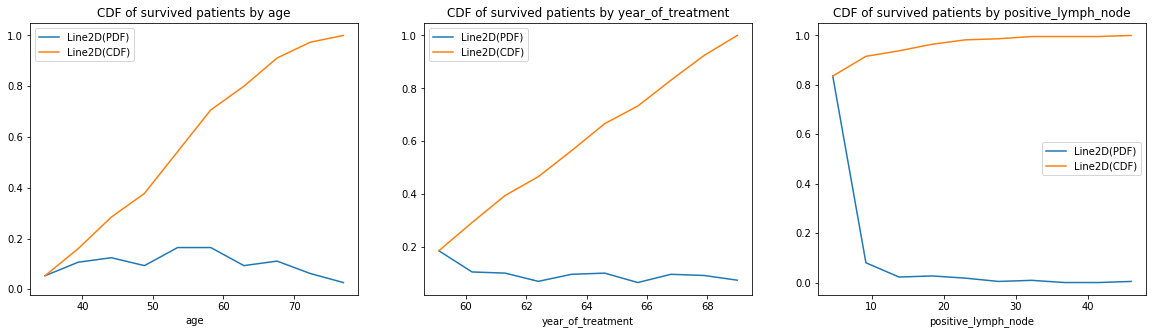


 age :

BIN Width: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
PDF: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
CDF: [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]

 year_of_treatment :

BIN Width: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
CDF: [0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]

 positive_lymph_node :

BIN Width: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
CDF: [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]

 *************************************

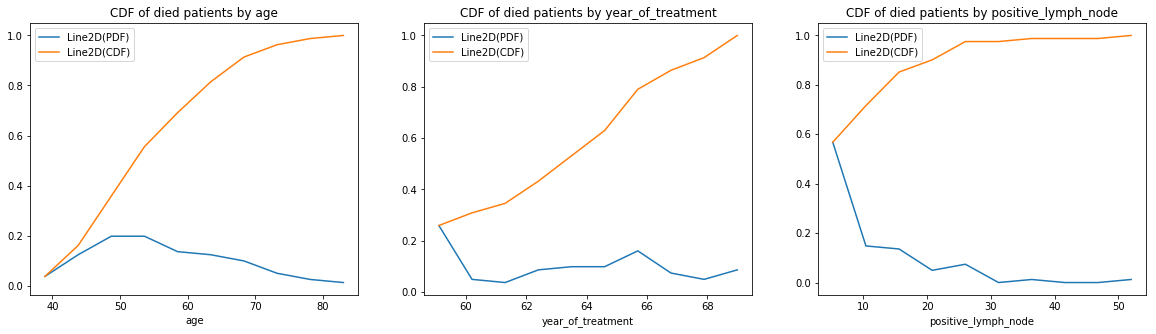

In [8]:
plt.close()
# CDF plot of all features from the list of alive patients
plt.figure(figsize=(20,5))
for index, feature in enumerate(list(haberman.columns[:-1])):
    plt.subplot(1,3,index+1)
    counts, bin_edges = np.histogram(surv_yes[feature], bins = 10, density=True)
    
    pdf = counts/sum(counts)
    print('\n',feature,':\n')
    print('BIN Width:',bin_edges)
    print('PDF:',pdf)
    cdf = np.cumsum(pdf)
    print('CDF:',cdf)
    pdf, = plt.plot(bin_edges[1:],pdf,label = 'PDF')
    cdf, = plt.plot(bin_edges[1:],cdf,label = 'CDF')
    plt.xlabel(feature)
    plt.legend([pdf,cdf])
    plt.title('CDF of survived patients by ' + feature)
print('\n', '*'*45, 'CDF of survived patients.','*'*45)
plt.show()
# CDF plot of all features from the list of dead patients
plt.figure(figsize=(20,5))
for index, feature in enumerate(list(haberman.columns[:-1])):
    plt.subplot(1,3, index+1)
    counts, bin_edges = np.histogram(surv_no[feature],bins = 10, density=True)
    
    pdf = counts/sum(counts)
    print('\n',feature, ':\n')
    print('BIN Width:',bin_edges)
    print('PDF:', pdf)
    cdf = np.cumsum(pdf)
    print('CDF:', cdf)
    pdf, = plt.plot(bin_edges[1:], pdf, label ='PDF')
    cdf, = plt.plot(bin_edges[1:],cdf ,label = 'CDF')
    plt.xlabel(feature)
    plt.legend([pdf,cdf])
    plt.title('CDF of died patients by ' + feature)
print('\n','*'*45, 'CDF of died patients.','*'*45)
plt.show()

### Observations -
* from above fig (1.3), 85% chance of long survival if number of axillary nodes detected are less than 5. 
* On the other hand from above fig(2.3),  55% of people who have nodes less than 5. 

### Box plots

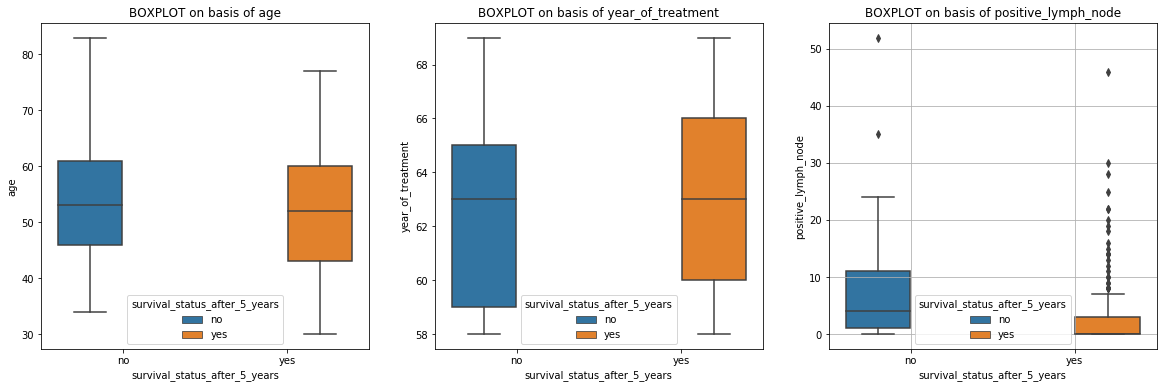

In [9]:
plt.close()

#Box plot
fig, axes = plt.subplots(1,3, figsize = (20,6))
for index, feature in enumerate(list(haberman.columns)[:-1]):
    sns.boxplot(x = 'survival_status_after_5_years', y = feature, data = haberman ,ax = axes[index],hue = 'survival_status_after_5_years')  \
    .set_title('BOXPLOT on basis of ' + feature)
    plt.grid()
plt.show()

### Violin Plots


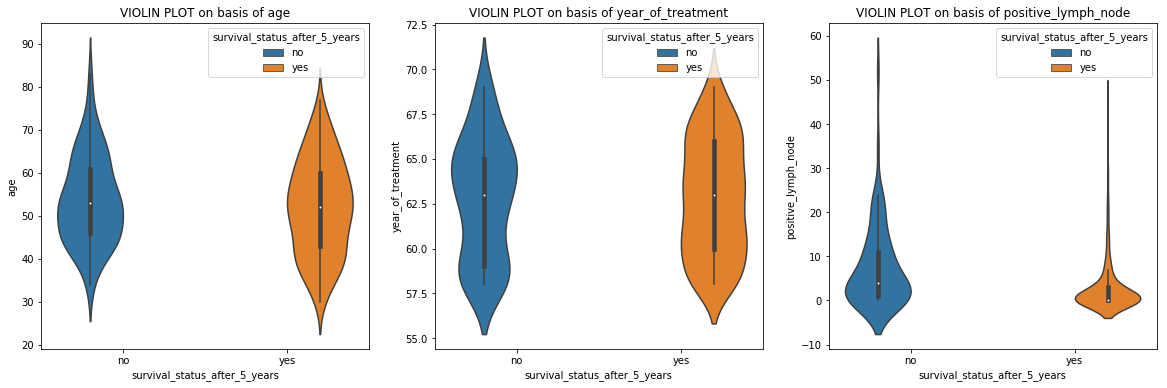

In [10]:
plt.close()
fig, axes = plt.subplots(1,3, figsize = (20,6))
for index, feature in enumerate(list(haberman.columns[:-1])):
    sns.violinplot(x= 'survival_status_after_5_years', y= feature, data = haberman,ax = axes[index],hue = 'survival_status_after_5_years')  \
    .set_title('VIOLIN PLOT on basis of ' + feature)
plt.show()

### Observations from both box plot and violin plot -
* from above fig(1.2), The patients treated after 1966 have the slightly higher chance to survive that the rest. The patients treated before 1959 have the slightly lower chance to survive that the rest.


### Bivariate Analysis

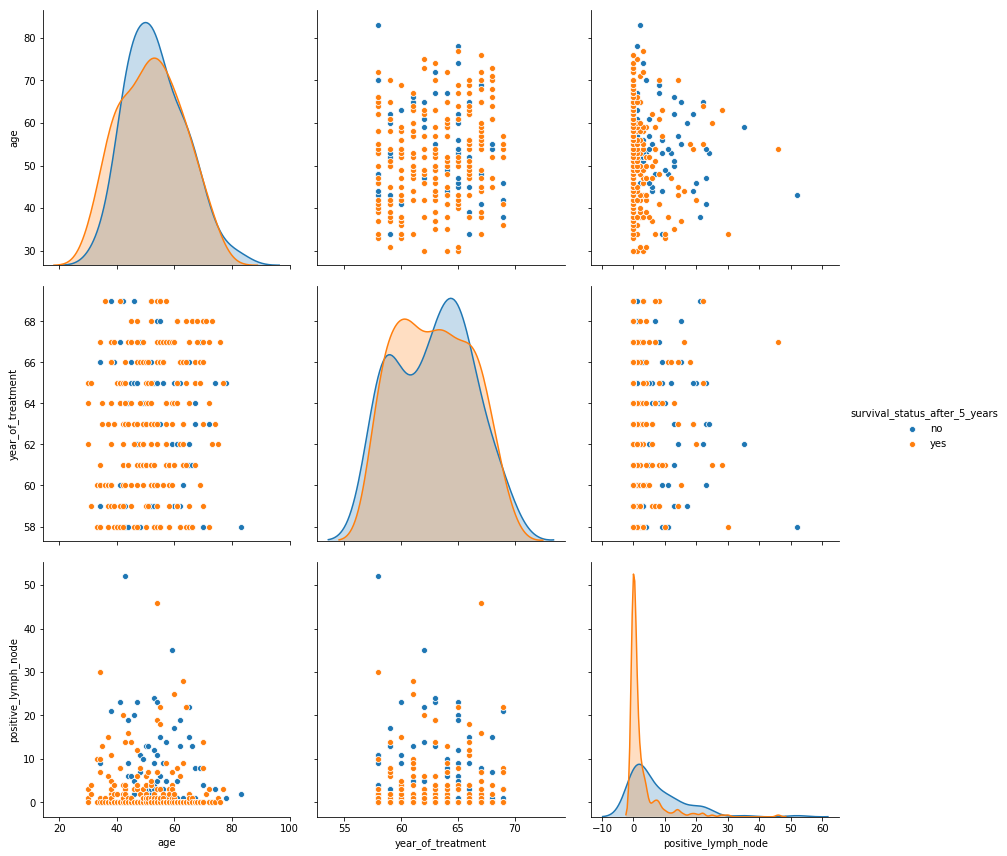

In [11]:
sns.pairplot(haberman, hue = 'survival_status_after_5_years', height = 4)
plt.show()

### Observations - 
* The combination of age of the patient and the number of axillary nodes is useful to predict the survival status after 5 years.
* The survival rate is very high(roughly 90%) for patients having age < 40 and the number of axillary nodes < 20.

## All over conclutions -
***
* The combination of age of the patient and the number of axillary nodes is useful to predict the survival status.
* The survival rate is very high(roughly 90%) for patients having age < 40 and the number of axillary nodes < 5.
* The year of operation and Patient's age are least useful feature towards classification of survival status of patients.
* We cannot distinguish the data easily with the help of these plots as most of them are overlapping.

***Finally, We can conclude that, 'Nos. of lymph nodes', can be the best variable to figure if a patient undergone for surgery can survive more than five years of not.***